In [40]:
library('moments')
library('plyr')
library('dplyr')
library('ggplot2')
library('GGally')
library('car')

In [2]:
# install.packages('moments')
# install.packages('plyr')
# install.packages('dplyr')
# install.packages('ggplot2')
# install.packages('GGally')

In [41]:
# desc http://davis.wpi.edu/xmdv/datasets/cereal.html

url = "http://lib.stat.cmu.edu/datasets/1993.expo/cereal"

cereals <-
  read.table(url,
             header = FALSE,
             as.is = TRUE,
             na.strings = "-1")

In [42]:
names(cereals) <-
  c(
    'name',
    'mfr',
    'type',
    'calories',
    'protein',
    'fat',
    'sodium',
    'fiber',
    'carbo',
    'sugars',
    'shelf',
    'potass',
    'vitamins',
    'weight',
    'cups'
  )

In [43]:
#checking for missing data and its number
sum(is.na(cereals))

[1] 15

In [44]:
#deleting missing values, creating new data frame cereal. There exist imputation methods, but we're not studying them.
cereals = na.omit(cereals)
str(cereals)

'data.frame':	65 obs. of  15 variables:
 $ name    : chr  "100%_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" "Apple_Cinnamon_Cheerios" ...
 $ mfr     : chr  "N" "K" "K" "G" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 70 50 110 110 130 90 90 120 110 ...
 $ protein : int  4 4 4 2 2 3 2 3 1 6 ...
 $ fat     : int  1 1 0 2 0 2 1 0 2 2 ...
 $ sodium  : int  130 260 140 180 125 210 200 210 220 290 ...
 $ fiber   : num  10 9 14 1.5 1 2 4 5 0 2 ...
 $ carbo   : num  5 7 8 10.5 11 18 15 13 12 17 ...
 $ sugars  : int  6 5 0 10 14 8 6 5 12 1 ...
 $ shelf   : int  3 3 3 1 2 3 1 3 2 1 ...
 $ potass  : int  280 320 330 70 30 100 125 190 35 105 ...
 $ vitamins: int  25 25 25 25 25 25 25 25 25 25 ...
 $ weight  : num  1 1 1 1 1 1.33 1 1 1 1 ...
 $ cups    : num  0.33 0.33 0.5 0.75 1 0.75 0.67 0.67 0.75 1.25 ...
 - attr(*, "na.action")= 'omit' Named int  2 5 21 39 44 45 46 51 56 58 ...
  ..- attr(*, "names")= chr  "2" "5" "21" "39" ...


In [45]:
# Creating a factor
cereals$shelf <- factor(cereals$shelf, levels = 1:3, ordered = TRUE)
cereals$shelf
table(cereals$shelf)

[1] 3 3 3 1 2 3 1 3 2 1 2 3 2 1 1 2 2 3 3 3 3 2 1 2 3 3 2 1 2 3 3 3 2 1 1 3 2 2
[39] 2 3 1 2 3 3 3 3 3 3 2 3 3 1 1 1 1 2 1 3 3 3 3 2 1 1 1
Levels: 1 < 2 < 3


 1  2  3 
18 18 29 

In [46]:
# if you want to name the factor levels instead of numbering them, package car, function recode
cereals$shelfC <-
  recode(cereals$shelf, " 1='low'; 2='medium'; 3='high' ")

In [47]:
# Basic statistical summary of the data set
summary(cereals)

     name               mfr                type              calories    
 Length:65          Length:65          Length:65          Min.   : 50.0  
 Class :character   Class :character   Class :character   1st Qu.:100.0  
 Mode  :character   Mode  :character   Mode  :character   Median :110.0  
                                                          Mean   :107.4  
                                                          3rd Qu.:110.0  
                                                          Max.   :160.0  
    protein           fat             sodium          fiber       
 Min.   :1.000   Min.   :0.0000   Min.   :  0.0   Min.   : 0.000  
 1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:140.0   1st Qu.: 0.000  
 Median :2.000   Median :1.0000   Median :190.0   Median : 1.500  
 Mean   :2.462   Mean   :0.9385   Mean   :175.4   Mean   : 2.185  
 3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:220.0   3rd Qu.: 3.000  
 Max.   :6.000   Max.   :3.0000   Max.   :320.0   Max.   :14.000  
     carbo   

In [48]:
# defining a function to calculate coefficient of variation:
cv = function(x) {
  sd = sqrt(var(x))
  mu = abs(mean(x))
  sd / mu
}

In [49]:
# using it
apply(cereals[, 7:10], 2, cv)

sodium     fiber     carbo    sugars 
0.4286788 1.1695297 0.2702772 0.5867096

In [50]:
#other function
cereal_stats = data.frame(
  cv = apply(cereals[, c(4:10, 12:15)], 2, cv),
  kurtosis = apply(cereals[, c(4:10, 12:15)], 2, kurtosis),
  skew = apply(cereals[, c(4:10, 12:15)], 2, skewness)
)

In [51]:
#using it
print(cereal_stats)

                cv kurtosis        skew
calories 0.1656678 6.005008 -0.62341330
protein  0.4431485 4.526630  0.82696035
fat      0.9009638 2.685449  0.58514557
sodium   0.4286788 3.363517 -0.71731751
fiber    1.1695297 9.802591  2.27434460
carbo    0.2702772 2.575780  0.20539196
sugars   0.5867096 1.817431  0.01802315
potass   0.7599692 4.557778  1.39032104
vitamins 0.7139905 9.926056  2.76463813
weight   0.1402434 7.373096  0.84731167
cups     0.3029334 3.285915  0.13353101


In [52]:
summarise(group_by(cereals, mfr), mean(sugars), sd(sugars))

`summarise()` ungrouping output (override with `.groups` argument)



mfr,mean(sugars),sd(sugars)
<chr>,<dbl>,<dbl>
G,7.954545,3.872704
K,7.904762,4.526641
N,2.000000,3.464102
P,8.777778,4.576510
Q,7.000000,4.795832
R,3.800000,1.643168


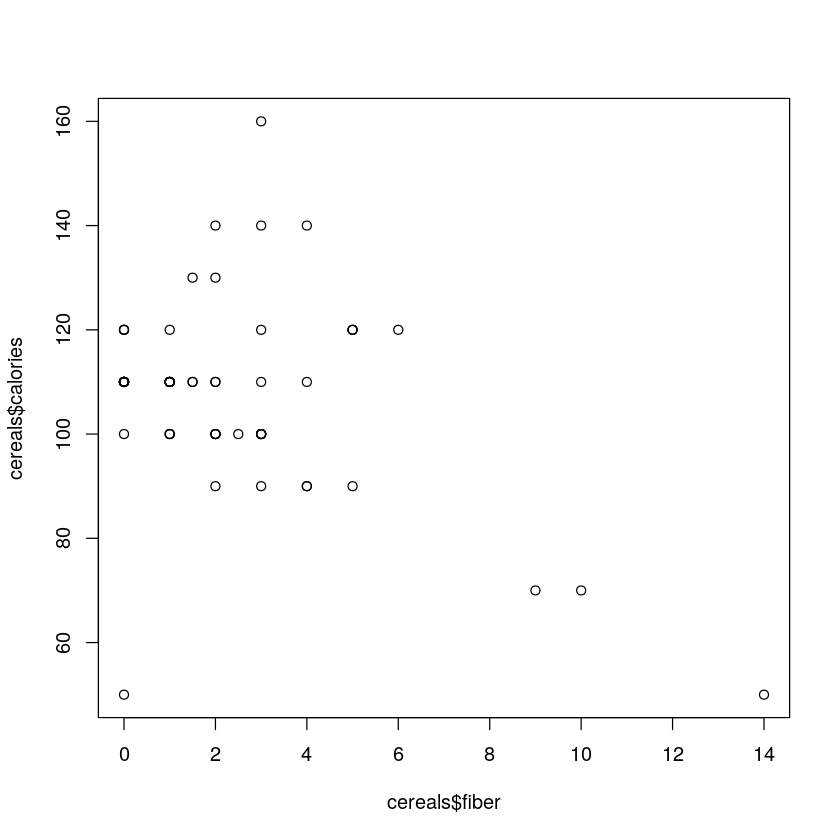

In [53]:
# Basic plot: relationship between fiber and calories
plot(cereals$fiber, cereals$calories)

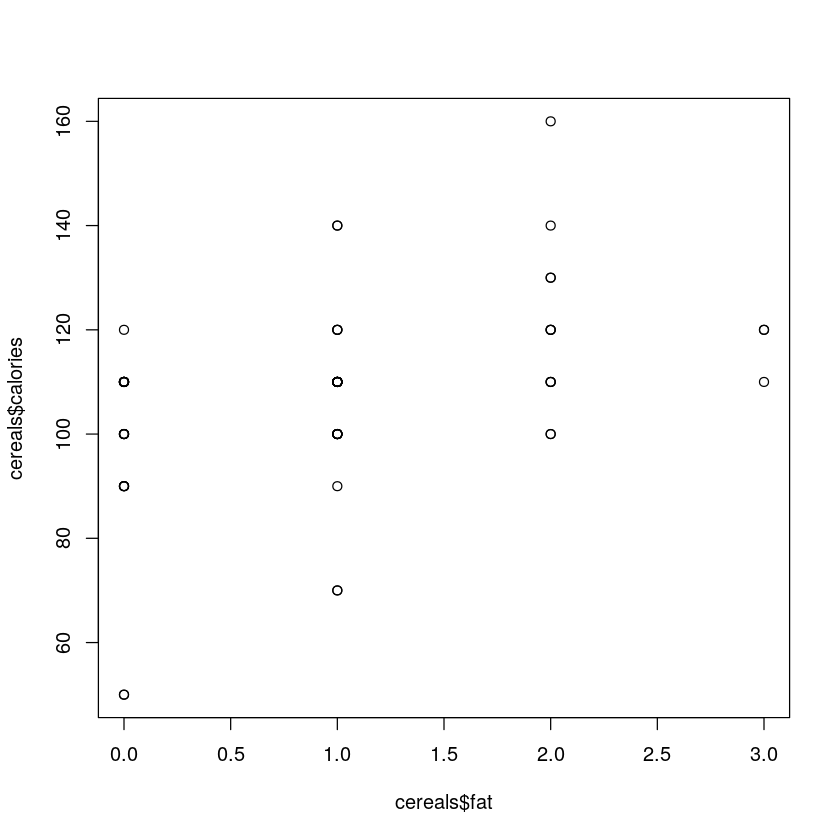

In [54]:
# Basic plot: relationship between fat and calories
plot(cereals$fat, cereals$calories)

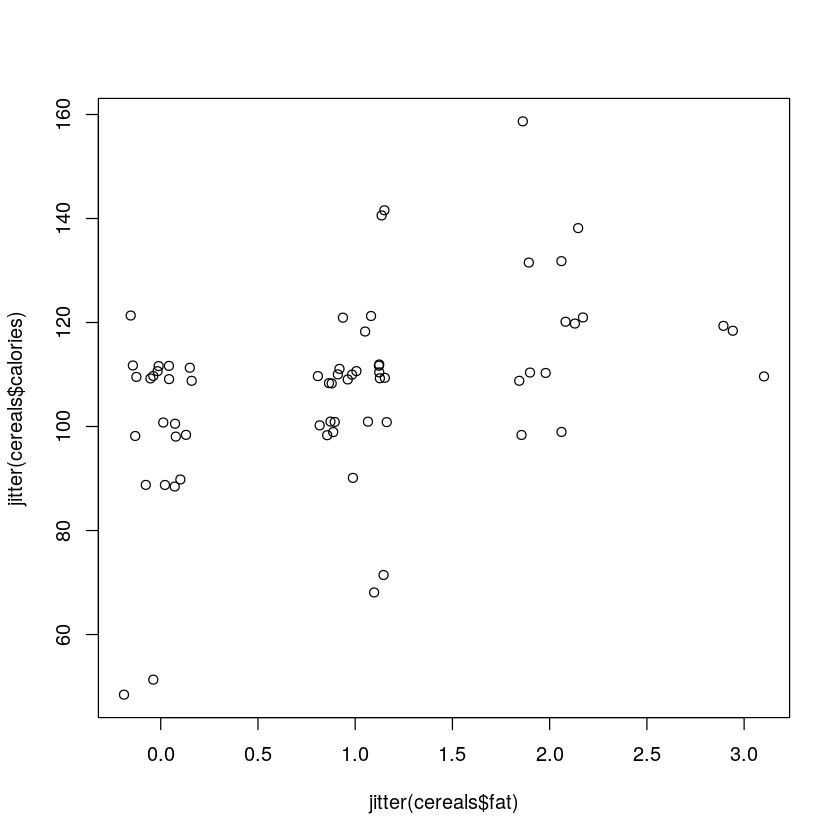

In [55]:
plot(jitter(cereals$fat), jitter(cereals$calories))